In [28]:
import sys
sys.path.append("..")

In [29]:
import Skeletonize
import numpy as np
import pymde
import Graph

np.set_printoptions(precision=2, suppress=True)

In [31]:
train_x, train_Y, embedding = Graph.load_embedding(60000)

In [52]:
res = []
for j in range(2, 41, 2):
    s, smap = Skeletonize.load_skeleton_and_smap(j)
    arr = np.zeros((len(s.nodes()), 10))
    for idx, i in enumerate(smap):
        arr[i, train_Y[idx]] += 1
    
    size = len(s.nodes())
    count = 0
    for row in arr:
        if np.count_nonzero(row) > 1:
            count += 1
    res.append([j, size, count])

In [41]:
import matplotlib.pyplot as plt

In [53]:
res_arr = np.array(res)
print(res_arr)

[[    2 60000     0]
 [    4 50041   749]
 [    6 36701  1075]
 [    8 18351  1250]
 [   10  8621  1216]
 [   12  3632  1018]
 [   14  1469   678]
 [   16   715   419]
 [   18   413   266]
 [   20   261   189]
 [   22   203   150]
 [   24   163   122]
 [   26   130   102]
 [   28   112    90]
 [   30    95    78]
 [   32    90    75]
 [   34    84    70]
 [   36    82    69]
 [   38    76    65]
 [   40    72    61]]


C:\Users\s174169\AppData\Local\Temp/ipykernel_23596/597420117.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([f'{int(x*100)}%' for x in ax2.get_yticks()])


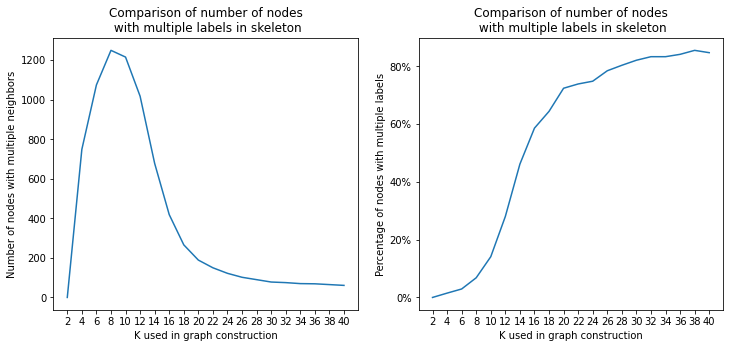

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(res_arr[:, 0], res_arr[:, 2])
ax1.set_xlabel("K used in graph construction")
ax1.set_ylabel("Number of nodes with multiple neighbors")
ax1.set_xticks([x for x in range(2, 41, 2)])

ax1.set_title("Comparison of number of nodes\n with multiple labels in skeleton")

ax2.plot(res_arr[:, 0], res_arr[:, 2]/res_arr[:, 1])
ax2.set_xlabel("K used in graph construction")
ax2.set_ylabel("Percentage of nodes with multiple labels")
ax2.set_xticks([x for x in range(2, 41, 2)])

ax2.set_title("Comparison of number of nodes\n with multiple labels in skeleton")
ax2.set_yticklabels([f'{int(x*100)}%' for x in ax2.get_yticks()])

plt.savefig("multiplelabels")